# Resumo

---
Esse notebook é a resolução do desafio 2 para a empresa KeyCash. Nele, precisamos precificar casas.

O desenvolvimento desse notebook foi seguindo a metodologia CRISP-DM.A maneira que escolhi para precificar os imóveis foi a aplicação de um modelo de regressão. Os modelos escolhidos para análise foram: Regressão Linear, Regressão Quadrática, Random Forest Regressor e Multilayer Perceptron Regression.


# Metodologia

---
CRISP DM é a abreviação de **Cross Industry Standard Process for Data Mining** que, trazendo para o português, pode ser entendida como processo padrão da indústria cruzada para mineração de dados. Essa é uma metodologia capaz de transformar os dados da empresa em conhecimento e informações de gerenciamento.

As etapas da metodologia são: Entendimento do problema, Compreensão dos dados, Preparação dos dados, Modelagem, Avaliação

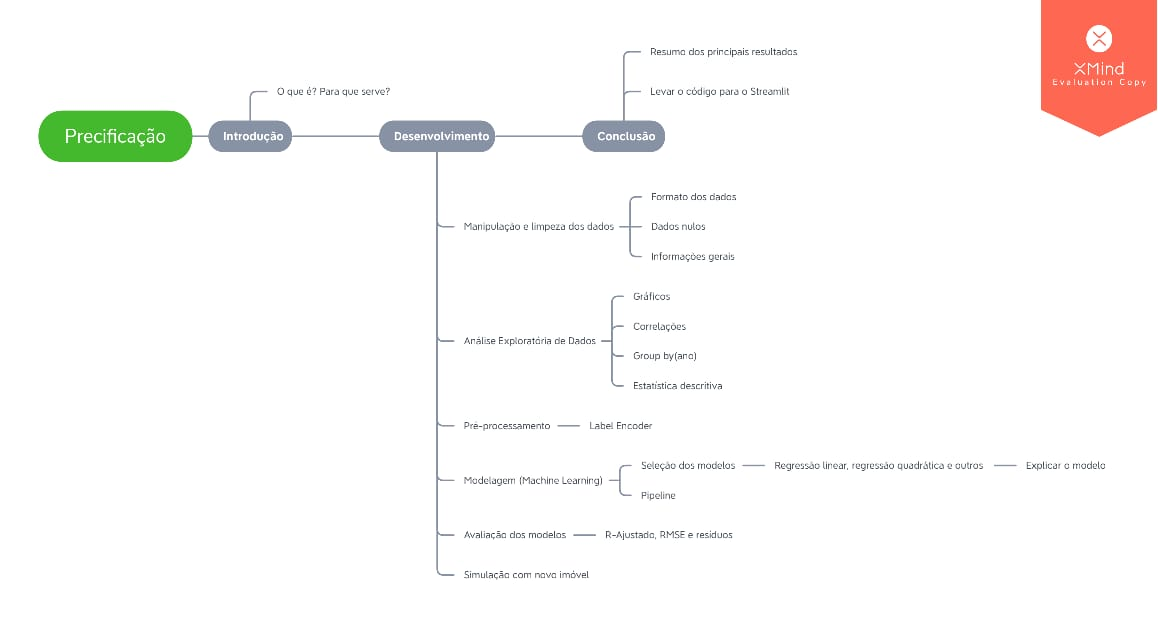

Na primeira sessão explicaremos sobre precificação, que é o objetivo do desafio. Aqui faremos uma abordagem teórica sobre o tema, explicando o que é e para que serve a precificação.

Na segunda sessão desenvolveremos a análise e a modelagem dos dados. Primeiro utilizaremos diversos métodos para investigar os dados, desde a descrição até a correlação e plotagem de gráficos. Depois aplicaremos modelos nesses dados, avaliando métricas para selecionar o mais adequado. Por último vamos simular um novo imóvel para precificá-lo

Na terceira sessão concluiremos a precificação com considerações finais sobre o modelo melhor avaliado.

# Introdução

---

**O que é precificação?**

Como o nome já nos sugere, precificar é definir o preço de mercadorias ou serviços. O preço não é uma variável fixa, ele varia conforme seus componentes.

**Para que serve?**

Os preços são o termômetro da demanda, ou seja, com eles, conseguimos analisar o comportamento da demanda pelo produto/serviço. Porém existem diferentes maneiras de praticar a precificação, uma delas é aplicar um modelo estatístico que precifique o produto/serviço da maneira mais eficiente, atraindo os consumidores e maximizando os lucros.

# Desenvolvimento

---

* Análise Exploratória
* Pré-processamento
* Aplicação e avaliação dos modelos
* Simulando um novo imóvel

## Análise Exploratória de Dados

Importando as bibliotecas necessárias

In [ ]:
#Manipulação e análise exploratória
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Pré-processamento
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split

#Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Métricas
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import jarque_bera, normaltest

#Outros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme('paper')

Com o dataset já selecionado, utilizaremos a biblioteca **pandas** para lê-lo e exibí-lo.

In [ ]:
df = pd.read_csv('Desafio2_input.csv', sep=';')
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
0,1,RL,9600,6,1976,Ex,2,3,4,6,1,2,181500
1,2,RL,14115,5,1993,Ex,1,1,2,5,0,2,143000
2,3,RL,11200,5,1965,Ex,1,3,4,5,0,1,129500
3,4,RL,12968,5,1962,TA,1,2,3,4,0,1,144000
4,5,RL,10920,6,1960,TA,1,2,3,5,1,1,157000


In [ ]:
#Transformando pés quadrados em metros quadrados
df['Area'] = df['Area']/10.764
df.head()

,Id,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
0,1,RL,891.861761,6,1976,Ex,2,3,4,6,1,2,181500
1,2,RL,1311.315496,5,1993,Ex,1,1,2,5,0,2,143000
2,3,RL,1040.505388,5,1965,Ex,1,3,4,5,0,1,129500
3,4,RL,1204.756596,5,1962,TA,1,2,3,4,0,1,144000
4,5,RL,1014.492754,6,1960,TA,1,2,3,5,1,1,157000


Podemos verificar a quantidade de linhas e colunas da seguinte maneira:

In [ ]:
print(f'O dataset possui: {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset possui: 629 linhas e 13 colunas


Passando a coluna 'Id' como índice do dataset, pois essa não será uma coluna relevante para nossa análise

In [ ]:
df.set_index('Id', inplace=True)

In [ ]:
df['Banheiros'].value_counts()

1    396
2    233
Name: Banheiros, dtype: int64

Visualizando informações sobre o dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 1 to 629
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Zona                  629 non-null    object 
 1   Area                  629 non-null    float64
 2   Qualidade             629 non-null    int64  
 3   AnoConstrucao         629 non-null    int64  
 4   QualidadeAquecimento  629 non-null    object 
 5   Banheiros             629 non-null    int64  
 6   Quartos_t1            629 non-null    int64  
 7   Quartos_t2            629 non-null    int64  
 8   Comodos               629 non-null    int64  
 9   Lareiras              629 non-null    int64  
 10  Garagem               629 non-null    int64  
 11  Preco                 629 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 63.9+ KB


### Estatística descritiva

---
A Estatística Descritiva é o ramo da estatística que visa sumarizar e descrever qualquer conjunto de dados. Em outras palavras, é aquela estatística que está preocupada em sintetizar os dados de maneira direta, preocupando-se menos com variações e intervalos de confiança dos dados. Exemplos de estatísticas descritivas são a média, o desvio padrão e a mediana. [Fonte](https://www.fm2s.com.br/estatistica-descritiva-basica-e-centralidade/)

Começaremos analisando os dados utilizando a função **describe**, com ela obtemos:

* Quantidade

* Média

* Desvio padrão

* Mínimo

* 1° quartil

* 2° quartil

* 3° quartil

* Máximo

Com uma linha de código podemos exibir uma descrição estatística dos dados

In [ ]:
df.describe()

,Area,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,829.805410,5.642289,1974.421304,1.370429,2.651828,3.651828,5.782194,0.515103,1.608903,148234.538951
std,308.331989,0.892748,19.189939,0.483304,0.551129,0.551129,1.039936,0.601361,0.577980,28088.037518
min,120.772947,4.000000,1940.000000,1.000000,1.000000,2.000000,3.000000,0.000000,0.000000,80000.000000
25%,689.334820,5.000000,1959.000000,1.000000,2.000000,3.000000,5.000000,0.000000,1.000000,129000.000000
50%,836.120401,6.000000,1971.000000,1.000000,3.000000,4.000000,6.000000,0.000000,2.000000,147000.000000
75%,978.260870,6.000000,1993.000000,2.000000,3.000000,4.000000,6.000000,1.000000,2.000000,173000.000000
max,1848.755110,8.000000,2009.000000,2.000000,3.000000,4.000000,8.000000,2.000000,3.000000,200000.000000


Plotando a distribuição das variáveis contínuas. Para isso, utilizaremos um loop for para plotar mais de uma variável sem repetir códigos. [Neste tutorial](https://www.kaggle.com/patrickgomes/how-to-plot-multiple-graphs-using-for-loop-easy), mostro como utilizar essa funcionalidade.

Analisar a distribuição nos dá uma visão sobre o comportamento da variável analisada. Assim obtemos uma informação importante. Para essa tarefa plotaremos histogramas. Se quiser entender melhor como funciona um histograma, [clique aqui](https://www.fm2s.com.br/histograma/)

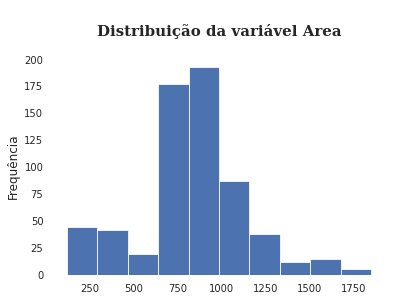

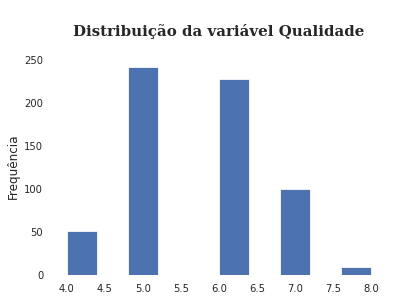

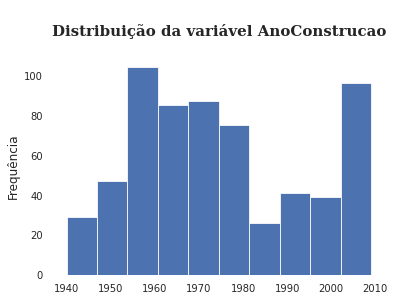

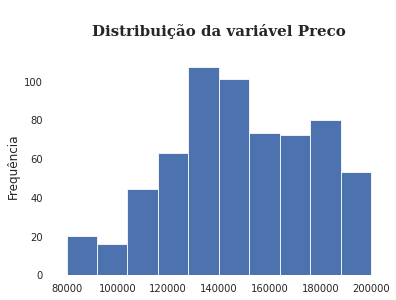

In [ ]:
colunas = ['Area', 'Qualidade', 'AnoConstrucao', 'Preco']
for i in colunas:
  df[f'{i}'].plot(kind='hist')
  plt.title(f'\nDistribuição da variável {i}\n', fontfamily='serif',fontweight = 'bold', fontsize=15)
  plt.xlabel('\n\n')
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  plt.ylabel('Frequência', fontsize=12)
  plt.box(False)
  plt.show()

Veremos agora como estão distribuídas as variáveis discretas. O gráfico escolhido com o BoxPlot.
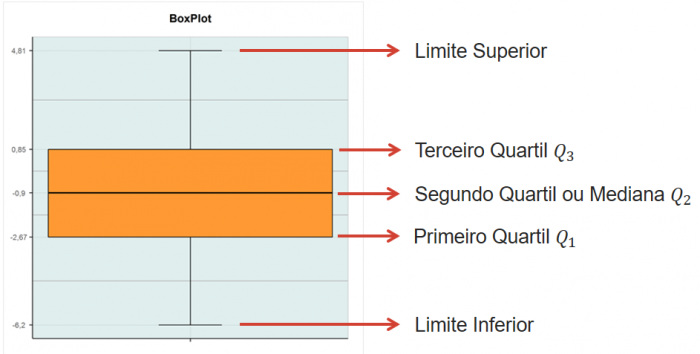


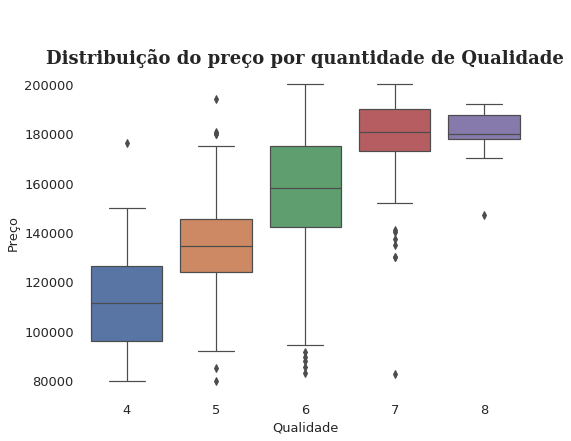

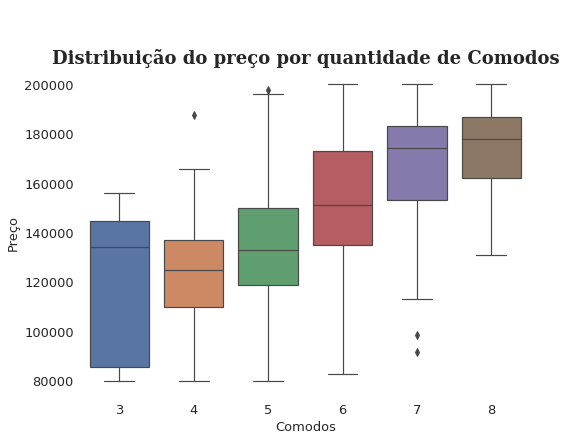

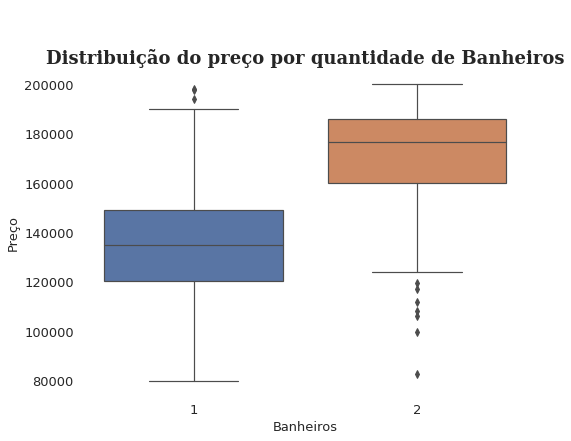

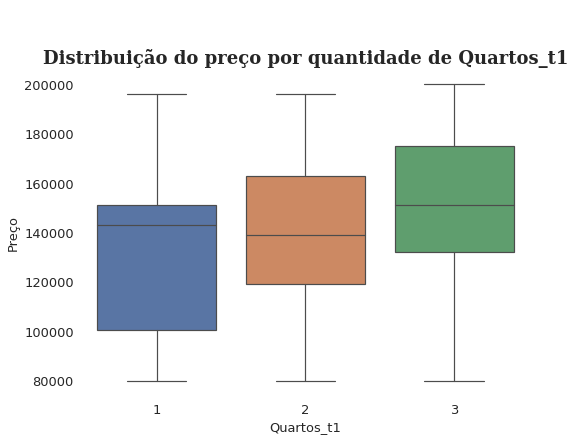

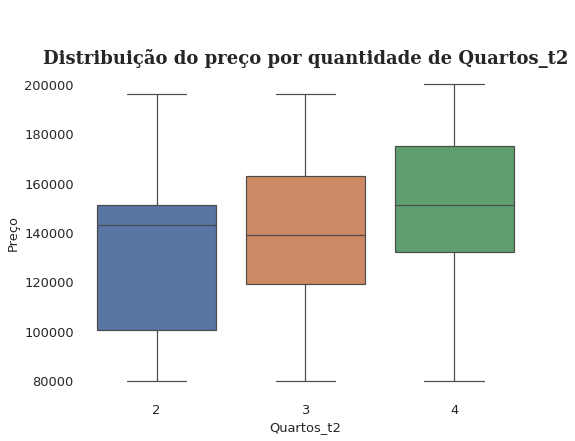

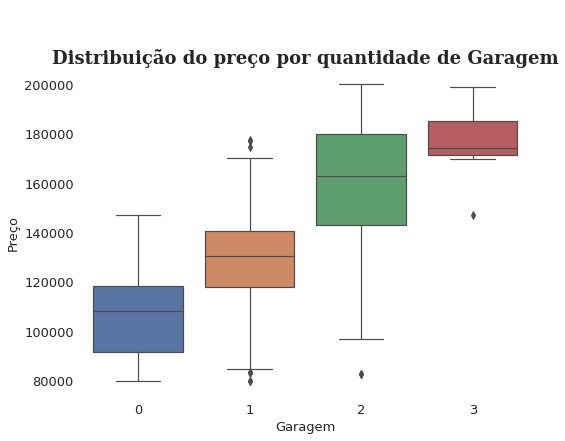

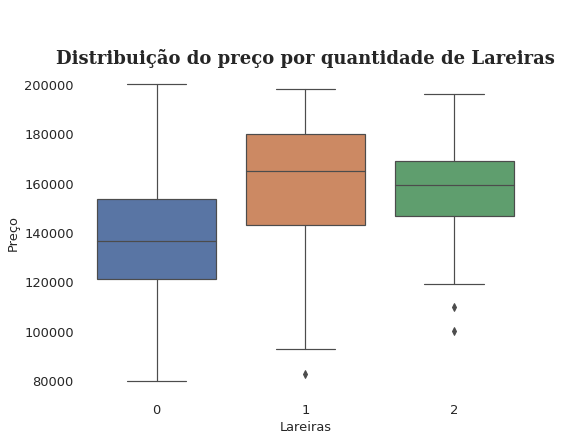

In [ ]:
coluna_discreta = ['Qualidade','Comodos', 'Banheiros','Quartos_t1','Quartos_t2', 'Garagem', 'Lareiras']
for i in coluna_discreta:
  plt.figure(figsize=(8,6))
  plt.title(f'\n\nDistribuição do preço por quantidade de {i}', fontsize=18, fontfamily='serif', fontweight='bold')
  sns.boxplot(df[f'{i}'], df['Preco'])
  plt.box(False)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel(f'{i}',fontsize=13)
  plt.ylabel('Preço',fontsize=13)
  plt.show();

### Correlação

**Um guia para interpretar correlações:**

Utilizaremos a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) nessa análise, ela se encaixa melhor com o objetivo do projeto.
* **1.0** positivo ou negativo indica uma correlação perfeita
* **0.9** positivo ou negativo indica uma correlação muito forte.
* **0.7 a 0.9** positivo ou negativo indica uma correlação forte.
* **0.5 a 0.7** positivo ou negativo indica uma correlação moderada.
* **0.3 a 0.5** positivo ou negativo indica uma correlação fraca.
* **0.1 a 0.3** positivo ou negativo indica uma correlação desprezível.
* **0** indica uma correlação inexistente

Primeiro vamos verificar as correlações entre as variáveis

In [ ]:
df.corr()

,Area,Qualidade,AnoConstrucao,Banheiros,Quartos_t1,Quartos_t2,Comodos,Lareiras,Garagem,Preco
Area,1.000000,-0.028974,-0.164230,0.027095,0.334651,0.334651,0.246016,0.213599,0.113745,0.297947
Qualidade,-0.028974,1.000000,0.579509,0.588077,0.070104,0.070104,0.392761,0.260709,0.456741,0.656785
AnoConstrucao,-0.164230,0.579509,1.000000,0.613079,-0.028868,-0.028868,0.199937,-0.031254,0.486783,0.558475
Banheiros,0.027095,0.588077,0.613079,1.000000,0.150195,0.150195,0.455426,0.202611,0.479552,0.626393
Quartos_t1,0.334651,0.070104,-0.028868,0.150195,1.000000,1.000000,0.564832,0.099971,0.026743,0.192015
Quartos_t2,0.334651,0.070104,-0.028868,0.150195,1.000000,1.000000,0.564832,0.099971,0.026743,0.192015
Comodos,0.246016,0.392761,0.199937,0.455426,0.564832,0.564832,1.000000,0.281535,0.273984,0.500864
Lareiras,0.213599,0.260709,-0.031254,0.202611,0.099971,0.099971,0.281535,1.000000,0.159043,0.340914
Garagem,0.113745,0.456741,0.486783,0.479552,0.026743,0.026743,0.273984,0.159043,1.000000,0.596711
Preco,0.297947,0.656785,0.558475,0.626393,0.192015,0.192015,0.500864,0.340914,0.596711,1.000000


Podemos ainda melhorar essa análise, exibindo essas correlações de uma forma mais elegante

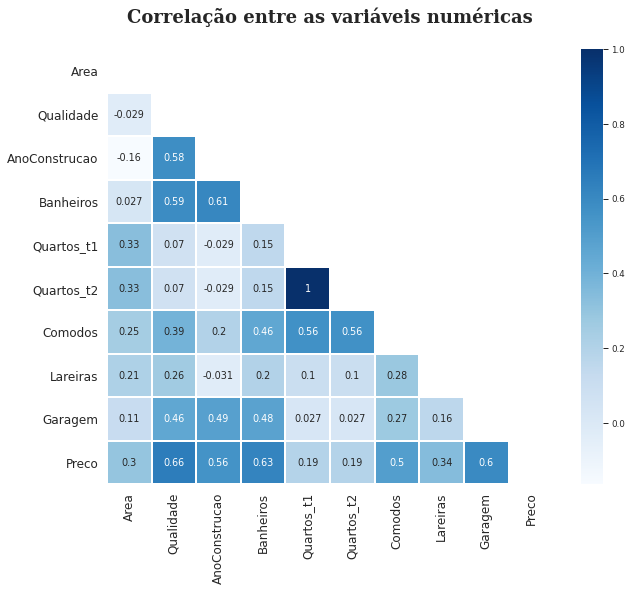

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
plt.title('Correlação entre as variáveis numéricas\n', fontfamily='serif', fontsize=18, fontweight='bold')
sns.heatmap(df.corr(), cmap='Blues', annot=True,linewidths=1, linecolor='white', mask=mask)
plt.box(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Bem melhor, não?!

Assim, ao olharmos já sabemos onde focar para descobrir as maiores e as menores correlações

In [ ]:
for i in coluna_discreta:
  corr = df[f'{i}'].corr(df['Preco'])
  print(f'Correlação entre {i} e preço: {corr:.3f}\n')

Correlação entre Qualidade e preço: 0.657

Correlação entre Comodos e preço: 0.501

Correlação entre Banheiros e preço: 0.626

Correlação entre Quartos_t1 e preço: 0.192

Correlação entre Quartos_t2 e preço: 0.192

Correlação entre Garagem e preço: 0.597

Correlação entre Lareiras e preço: 0.341



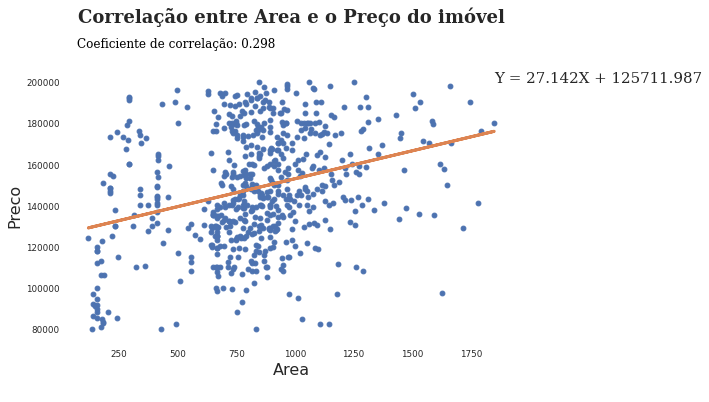

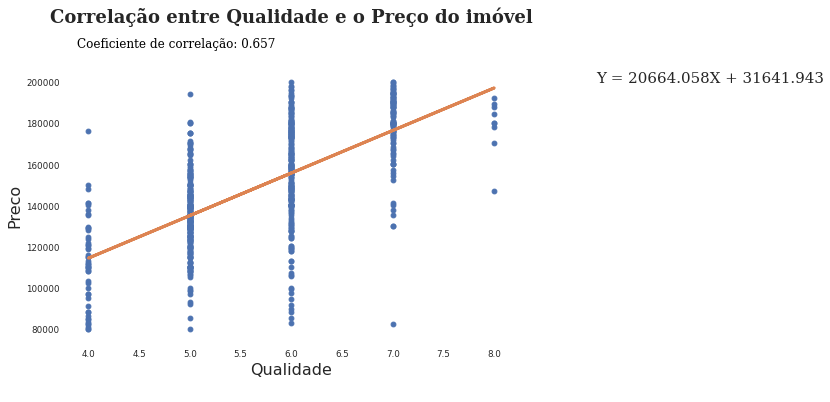

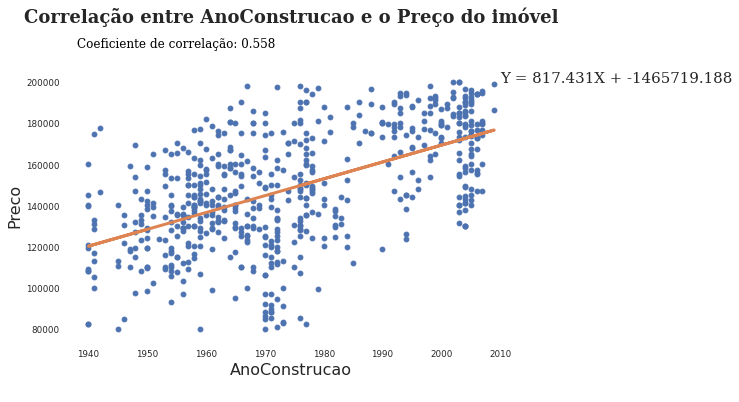

In [ ]:
for i in colunas[:-1]:
  corr = df[f'{i}'].corr(df['Preco'])

  m,b = np.polyfit(df[f'{i}'],df['Preco'],1) #Os coeficientes da equação usando np.polyfit
  eq = m*df[f'{i}']+b #Aqui definimos a equação

  fig, ax = plt.subplots(1,1,figsize=(8,5))
  plt.plot(df[f'{i}'],df['Preco'], 'o') #Plotar os pontos
  plt.plot(df[f'{i}'], eq, linewidth=3)
  plt.box(False)
  plt.title(f'Correlação entre {i} e o Preço do imóvel\n\n',fontsize=18, fontweight='bold', fontfamily='serif')
  plt.text (df[f'{i}'].max()+1, df['Preco'].max(), f'Y = {m:.3f}X + {b:.3f}',fontsize=15,fontfamily='serif')
  fig.text(0.14,0.90,f'Coeficiente de correlação: {corr:.3f}\n', fontsize=12, color='black', fontfamily='serif')
  plt.xlabel(f'{i}\n', fontsize=16)
  plt.ylabel('Preco', fontsize=16);

### Preco ao longo do tempo

---
Agora vamos verificar a evolução do preço ao longo do ano em que a casa foi construída. Para isso, agruparemos os dados pela coluna "AnoConstrucao" e selecionaremos a média do preço.

Plotaremos essa variável junto da sua média móvel

Nesse link eu explico a importância e como plotar médias móveis

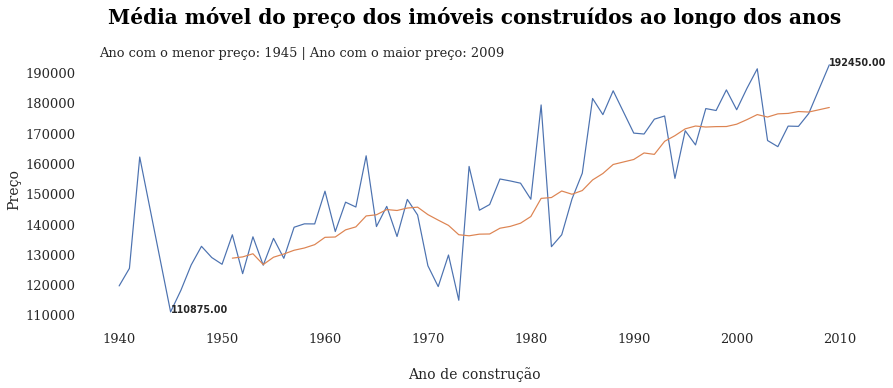

In [ ]:
ano_preco = df.groupby('AnoConstrucao')['Preco'].mean()
ano_preco_movel = df.groupby('AnoConstrucao')['Preco'].mean().rolling(10).mean()
texto = ano_preco.idxmin(),ano_preco.min()
texto2 = ano_preco.idxmax(),ano_preco.max()
menor_dia = str(texto).split(',')[0].strip('(')
maior_dia = str(texto2).split(',')[0].strip('(')
fig, ax = plt.subplots(1,1,figsize=(14,5))
ano_preco.plot()
ano_preco_movel.plot()
plt.title('Média móvel do preço dos imóveis construídos ao longo dos anos\n', fontsize=20, fontfamily='serif', fontweight = 'bold', color='Black')
plt.annotate(f'{ano_preco.max():.2f}',(ano_preco.idxmax(),ano_preco.max()), fontweight='bold')
plt.annotate(f'{ano_preco.min():.2f}',(ano_preco.idxmin(),ano_preco.min()), fontweight='bold')
plt.xticks(fontfamily='serif', fontsize=13)
plt.yticks(fontfamily='serif', fontsize=13)
plt.ylabel('Preço', fontfamily='serif', fontsize=14)
plt.xlabel('\nAno de construção', fontfamily='serif', fontsize=14)
fig.text(0.14, 0.87, f'Ano com o menor preço: {menor_dia} | Ano com o maior preço: {maior_dia}', fontsize=13, fontfamily='serif')
plt.box(False)


## Pré-processamento dos dados
O pré-processamento é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.

Essa etapa é de grande importância, pois será determinante para a qualidade final dos dados que serão analisados. Ela pode, inclusive, impactar no modelo de previsão, gerado a partir dos dados.

[Fonte](https://www.datageeks.com.br/pre-processamento-de-dados/)

**Transformação dos dados:**

* LabelEncoder

Selecionando as colunas desejadas (as selecionei de acordo com a correlação com os preços, e depois de fazer alguns testes)

In [ ]:
X = df[['Zona', 'Area', 'Qualidade', 'AnoConstrucao', 'QualidadeAquecimento', 'Banheiros', 'Comodos', 'Lareiras', 'Garagem']]
Y = df['Preco']

Separando os dados de treino e teste

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

Verificando o tamanho dos dados de treino e de teste

In [ ]:
print(f'Dados de treino:\n{X_treino.shape[0]} linhas e {X_treino.shape[1]} colunas\n\n')
print(f'Dados de teste:\n{X_teste.shape[0]} linhas e {X_teste.shape[1]} colunas')

Dados de treino:
503 linhas e 9 colunas


Dados de teste:
126 linhas e 9 colunas


In [ ]:
label_X = LabelEncoder()
X_treino['Zona'] = label_X.fit_transform(X_treino['Zona'])
X_teste['Zona'] = label_X.fit_transform(X_teste['Zona'])
X_teste['QualidadeAquecimento'] = label_X.fit_transform(X_teste['QualidadeAquecimento'])
X_treino['QualidadeAquecimento'] = label_X.fit_transform(X_treino['QualidadeAquecimento'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
X_treino

,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Comodos,Lareiras,Garagem
Id,,,,,,,,,
334,0,1512.913415,7,2001,0,2,6,0,2
7,0,1272.296544,5,2004,0,1,6,0,2
105,1,156.075808,6,1971,3,1,5,0,1
115,0,780.379041,5,1957,3,1,5,0,1
487,0,743.218135,6,1995,2,2,8,1,2
...,...,...,...,...,...,...,...,...,...
72,0,765.886288,7,2004,0,2,7,1,2
107,0,878.205128,7,1993,0,2,7,0,2
271,0,1105.536975,7,1977,3,2,6,1,2


In [ ]:
for i in X_treino.columns:
  print(X_treino[i].value_counts())

0    447
1     56
Name: Zona, dtype: int64
891.861761     14
668.896321     11
156.075808      7
295.615013      6
780.379041      6
               ..
909.513192      1
1076.179859     1
1160.628019     1
689.334820      1
1015.421776     1
Name: Area, Length: 400, dtype: int64
5    198
6    174
7     84
4     40
8      7
Name: Qualidade, dtype: int64
2004    26
2005    20
1959    18
1976    18
1958    17
        ..
1991     2
1942     2
1952     1
1981     1
2009     1
Name: AnoConstrucao, Length: 65, dtype: int64
0    205
3    189
2     97
1     12
Name: QualidadeAquecimento, dtype: int64
1    318
2    185
Name: Banheiros, dtype: int64
6    202
5    140
7     95
4     34
8     24
3      8
Name: Comodos, dtype: int64
0    268
1    206
2     29
Name: Lareiras, dtype: int64
2    313
1    167
0     17
3      6
Name: Garagem, dtype: int64


Podemos ainda comparar graficamente as correlações entre as variáveis para os dados de treino e os dados de teste.

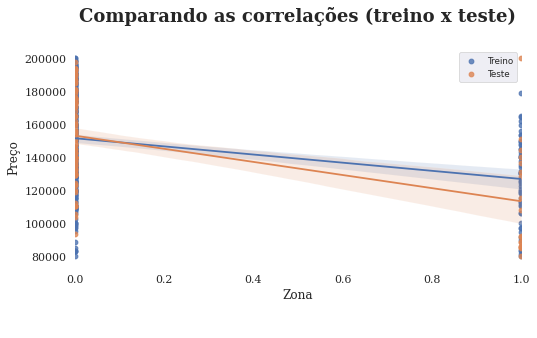

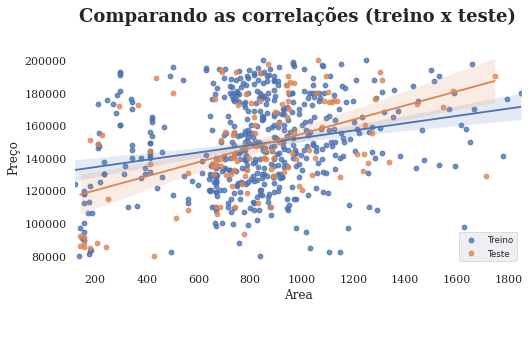

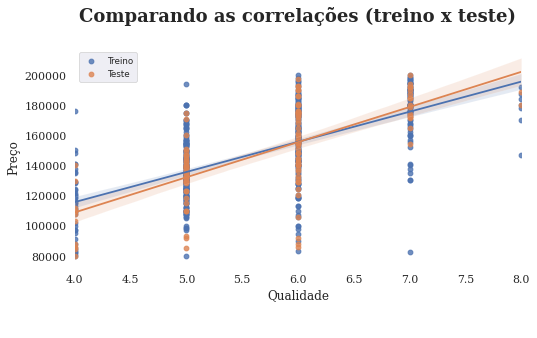

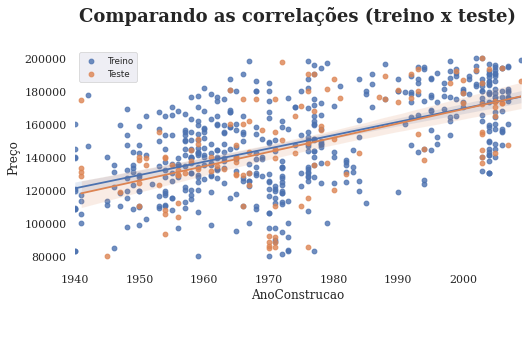

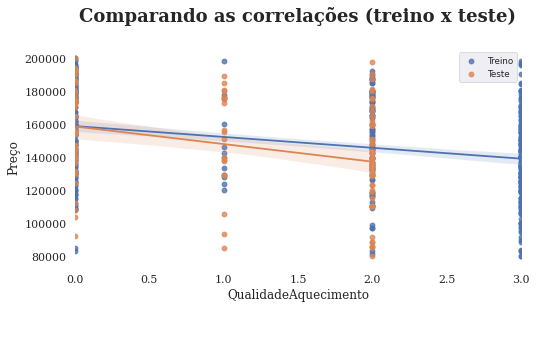

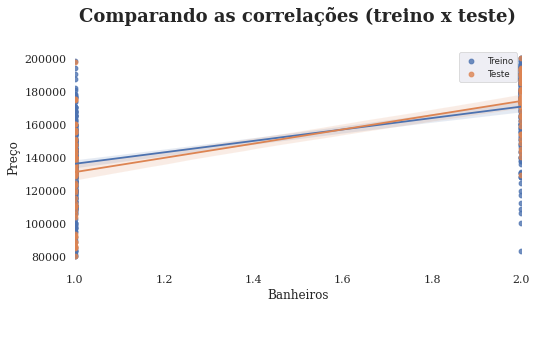

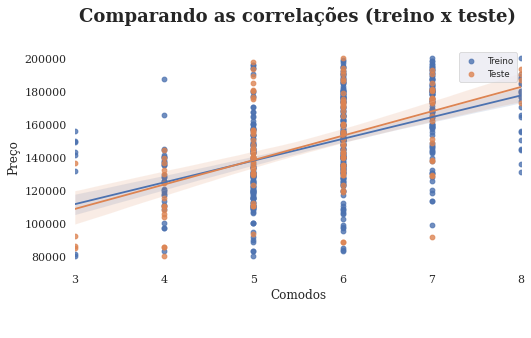

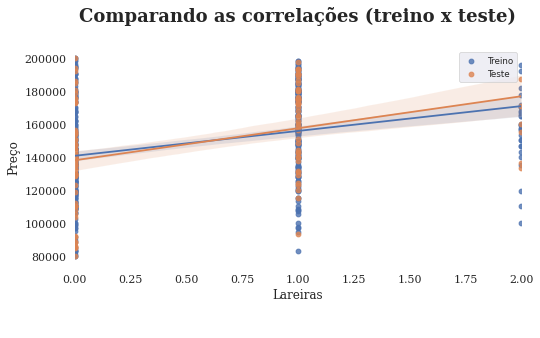

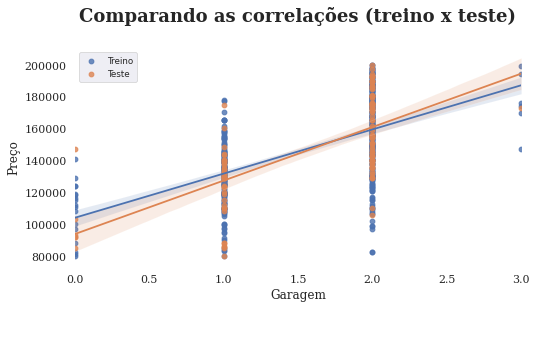

In [ ]:
for i in X_treino.columns:
  plt.figure(figsize=(8,4))
  sns.regplot(X_treino[i], Y_treino, label='Treino')
  sns.regplot(X_teste[i], Y_teste, label='Teste')
  plt.box(False)
  plt.title('Comparando as correlações (treino x teste)\n', fontsize=18, fontfamily='serif', fontweight='bold')
  plt.xlabel(f'{i}\n\n',fontsize=12, fontfamily='serif')
  plt.ylabel('Preço',fontsize=12, fontfamily='serif')
  plt.xticks(fontsize=11, fontfamily='serif')
  plt.yticks(fontsize=11, fontfamily='serif')
  plt.legend()
  plt.show()

## Aplicação e avaliação dos modelos

---
Os modelos selecionados foram: **Regressão Linear**, **Regressão Quadrática**, **Decision Tree Regressor** e **Multilayer perceptron**.

Aplicarei cada modelo e depois os avaliaremos


### Modelos

**Regressão Linear**

---
Um modelo de regressão linear é uma equação matemática que fornece uma relação linear, ou seja, de linha reta entre duas variáveis, comumente chamada de B0 e B1

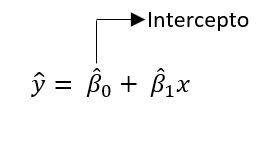

Cada um dos conjuntos de valores do estimador de beta zero e estimador de beta 1 fornece uma linha reta diferente. O intercepto é fornecido com base no termo constante na equação e corresponde ao valor do estimador de y quando x é zero.

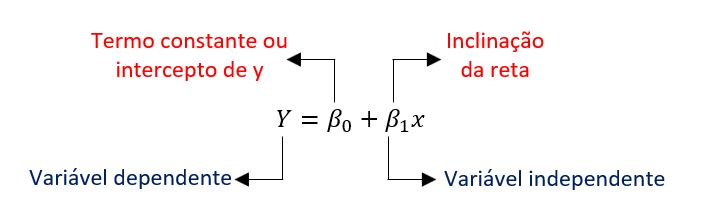

O coeficiente de B0 ou inclinação da linha fornece a quantidade de variação em B1 estimado, que é decorrente da variação correspondente a uma unidade de B0. Esse é o modelo de regressão linear simples.


Entretanto, em muitos casos, a relação entre duas variáveis não é exata. Por causa disso, precisamos levar em consideração a ausência de outras variáveis no modelo e adicionamos o erro aleatório, representado pela letra épsilon. Mais uma letrinha grega para o seu mais novo dicionário.

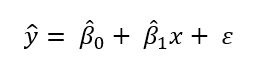

[Fonte](https://oestatistico.com.br/regressao-linear-simples/)

Imagem representativa da regressão linear:
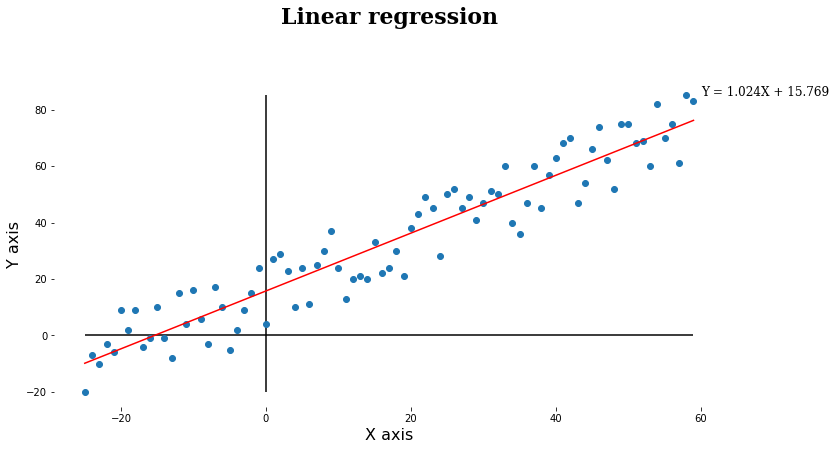

Eu tenho um tutorial no Kaggle explicando duas maneiras de como fazer uma regressão linear, usando Numpy e Scikit-learn: https://www.kaggle.com/patrickgomes/2-ways-to-create-a-simple-linear-regression

**Regressão polinomial**

---
Segue a mesma lógica da regressão linear, porém com mais graus (n). Aqui utilizamos n = 2. Logo, será uma regressão quadrática.

Ela será feita num pipeline, recebendo esse nome no output da função


**Decision Tree Regressor**

---
Árvores de decisão (DTs) são um método de aprendizado supervisionado não paramétrico usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados. Uma árvore pode ser vista como uma aproximação constante por partes. [Fonte](https://scikit-learn.org/stable/modules/tree.html#tree)

Árvores de decisão usadas para problemas de regressão são chamadas de Árvores de Regressão. Nas árvores de regressão cada nó terminal ou folha contém uma constante (geralmente, uma média) ou uma equação para o valor previsto de um determinado conjunto de dados. [Fonte](https://www.maxwell.vrac.puc-rio.br/3710/3710_4.PDF)


**Multilayer Perceptron (MLP)**

---

O perceptron de múltiplas camadas é um sistema capaz de resolver problemas além dos linearmente separáveis e que tem como unidade básica o Perceptron. Ao contrário do Perceptron que possui apenas 1 camada e resolve apenas problemas linearmente separáveis, a MLP é uma rede neural artificial que apresenta ao menos 1 camada intermediária. [Fonte](http://revistas.poli.br/index.php/repa/article/view/1339/612)

### Métricas

Utilizaremos duas métricas para avaliar os modelos, uma é o R2-ajustado e a outra é a Raíz do Erro Médio Quadrático

O **R-quadrado** ajustado compara o poder explicativo dos modelos de regressão que contêm diferentes números de preditores. Ou seja, é uma métrica para regressões lineares múltiplas. [Fonte](https://blog.minitab.com/pt/analise-de-regressao-multipla-use-o-r-quadrado-ajustado-e-o-r-quadrado-predito-para-incluir-o-numero-correto-de-variaveis)

A raiz quadrada de MSE, ou **Raiz do Erro Quadrático Médio** (RMSE em Inglês), é comumente usada para expressar a acurácia dos resultados numéricos com a vantagem de que RMSE apresenta valores do erro nas mesmas dimensões da variável analisada. [Fonte](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0102-77862011000400009#:~:text=Em%20adi%C3%A7%C3%A3o%20ao%20MSE%2C%20a,mesmas%20dimens%C3%B5es%20da%20vari%C3%A1vel%20analisada.)

In [ ]:
modelos = [LinearRegression(normalize=True), make_pipeline(PolynomialFeatures(2),LinearRegression(normalize=True)), tree.DecisionTreeRegressor(), MLPRegressor(random_state=1, max_iter=500)]


def modelagem():
  for modelo in modelos:
    previsao = modelo.fit(X_treino, Y_treino).predict(X_teste)
    resultado = f'{str(modelo).split("(")[0]}\n\n'
    adj_r2 = (1 - ((1 - r2_score(Y_teste, previsao)) * (len(Y_teste) - 1)) / (len(Y_teste) - X_treino.shape[1] - 1))
    MSE = mean_squared_error(Y_teste, previsao)
    RMSE = MSE**0.5
    print(f'{str(modelo).split("(")[0]}\nR-ajustado: {adj_r2:.3f}\nRaíz do Erro Médio Quadrático: {RMSE:.3f}\n\n')
    
modelagem()

LinearRegression
R-ajustado: 0.785
Raíz do Erro Médio Quadrático: 13175.912


Pipeline
R-ajustado: 0.708
Raíz do Erro Médio Quadrático: 15345.594


DecisionTreeRegressor
R-ajustado: 0.529
Raíz do Erro Médio Quadrático: 19496.923


MLPRegressor
R-ajustado: 0.211
Raíz do Erro Médio Quadrático: 25235.578




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


O modelo que obteve o melhor desempenho foi a **regressão linear**, com um R-ajustado de **0,787** e um Erro Médio Quadrático de **13.118,204**

In [ ]:
lr = LinearRegression(normalize=True)
lr.fit(X_treino, Y_treino)
previsao = lr.predict(X_teste)

### Análise simples dos coeficientes e resíduos

---





In [ ]:

coefi = lr.coef_

for i,v in enumerate(coefi):
	print(f'{X.columns[i]} -----> Score: {v:.3f}')

Zona -----> Score: -9925.923
Area -----> Score: 18.002
Qualidade -----> Score: 7892.642
AnoConstrucao -----> Score: 343.323
QualidadeAquecimento -----> Score: -1752.014
Banheiros -----> Score: 6381.796
Comodos -----> Score: 3026.757
Lareiras -----> Score: 6646.694
Garagem -----> Score: 9920.108


Plotando a relevância das variáveis a partir dos coeficientes

In [ ]:
azul = '#4169E1'
vermelho = '#FF0000'
paleta_grafico = [vermelho, azul, azul, azul,vermelho, azul, azul, azul, azul]

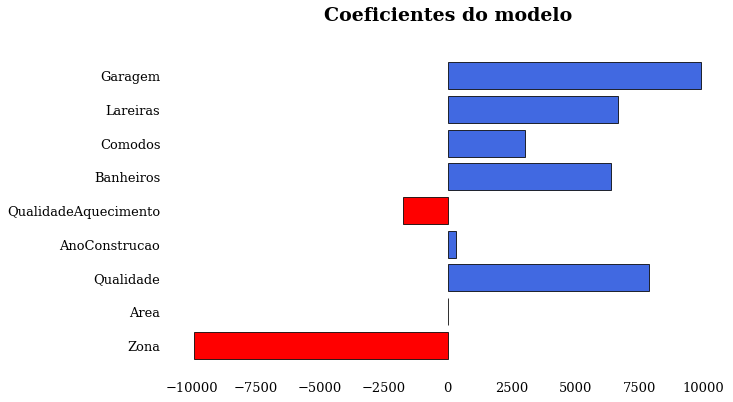

In [ ]:
plt.figure(figsize=(10,6))
plt.box(False)
plt.barh(['Zona','Area', 'Qualidade', 'AnoConstrucao', 'QualidadeAquecimento', 'Banheiros', 'Comodos', 'Lareiras', 'Garagem'], coefi, color=paleta_grafico, edgecolor= 'Black')
plt.title('Coeficientes do modelo\n', fontfamily='serif', fontsize=19, color='Black', fontweight='bold')
plt.yticks(fontsize=13, fontfamily='serif', color='Black')
plt.xticks(fontsize=13, fontfamily='serif', color='Black');

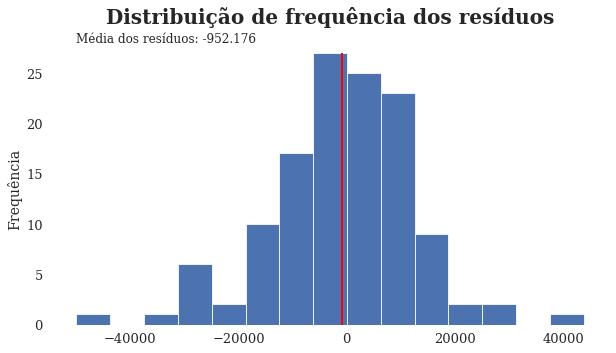

In [ ]:
resid = Y_teste - previsao
plt.figure(figsize=(10,5))
resid.plot(kind='hist', bins=15)
plt.box(False)
plt.xticks(fontsize=13, fontfamily='serif')
plt.yticks(fontsize=13, fontfamily='serif')
plt.vlines(resid.mean(), ymin=0, ymax=30, colors='red', linewidth=2)
plt.ylim(0,27)
plt.ylabel('Frequência', fontsize=14, fontfamily='serif')
plt.text(-50000,28, f'Média dos resíduos: {resid.mean():.3f}', fontfamily='serif', fontsize=12)
plt.title('Distribuição de frequência dos resíduos\n', fontfamily='serif', fontsize=20, fontweight='bold');

In [ ]:
X

,Zona,Area,Qualidade,AnoConstrucao,QualidadeAquecimento,Banheiros,Comodos,Lareiras,Garagem
Id,,,,,,,,,
1,RL,891.861761,6,1976,Ex,2,6,1,2
2,RL,1311.315496,5,1993,Ex,1,5,0,2
3,RL,1040.505388,5,1965,Ex,1,5,0,1
4,RL,1204.756596,5,1962,TA,1,4,0,1
5,RL,1014.492754,6,1960,TA,1,5,1,1
...,...,...,...,...,...,...,...,...,...
625,RL,780.379041,6,1966,Gd,1,6,0,1
626,RM,142.419175,5,1970,Ex,1,3,0,0
627,RM,341.415831,5,2005,Gd,1,5,0,2


## Simulando um novo imóvel

---
Uma maneira interessante de ver o modelo em ação é simular um dado novo, aqui no caso simularemos um novo imóvel a ser precificado.

O imóvel simulado terá as seguintes características:



* Zona: 0 (RL)
* Area: 16000
* Qualidade: 4
* AnoConstrucao: 2004
* QualidadeAquecimento: 0 (Ex)
* Banheiros: 1
* Comodos: 5
* Lareiras: 2
* Garagem: 3
 


In [ ]:
#['Zona', 'Area', 'Qualidade', 'AnoConstrucao', 'QualidadeAquecimento', 'Banheiros', 'Comodos', 'Lareiras', 'Garagem']
imovel_simulado = np.array([0, 950,	4,	2004,	0,	1,	5,	2,	3]).reshape(1,-1)
preco_imovel_simulado = lr.predict(imovel_simulado)
if resid.mean() > 0:
  print(f'Preço: {preco_imovel_simulado[0]:.2f}\nMargem: Entre {(preco_imovel_simulado - resid).mean():.2f} e {(preco_imovel_simulado + resid).mean():.2f}')
elif resid.mean() <=0:
  print(f'Preço: {preco_imovel_simulado[0]:.2f}\nMargem: Entre {(preco_imovel_simulado + resid).mean():.2f} e {(preco_imovel_simulado - resid).mean():.2f}')

Preço: 170411.35
Margem: Entre 169459.17 e 171363.53


De acordo com nosso modelo, o imóvel simulado tem o preço de **180.068,21** (Cento e oitenta mil e sessenta e oito reais e vinte e um centavos).

# Conclusão

---

Conseguimos desenvolver um modelo de precificação para esse conjunto de dados utilizando uma **Regressão Linear Múltipla** com as seguintes variáveis: 'Zona', 'Area', 'Qualidade', 'AnoConstrucao', 'QualidadeAquecimento', 'Banheiros', 'Comodos', 'Lareiras', 'Garagem'

Os resultados das métricas que obtivemos com esse modelo foram:
* R2 - Ajustado: **0,787**
* RMSE: **13.118,204**

Depois da modelagem, criamos uma simulação onde obtivemos o preço de um imóvel saindo por **180.068,21**.

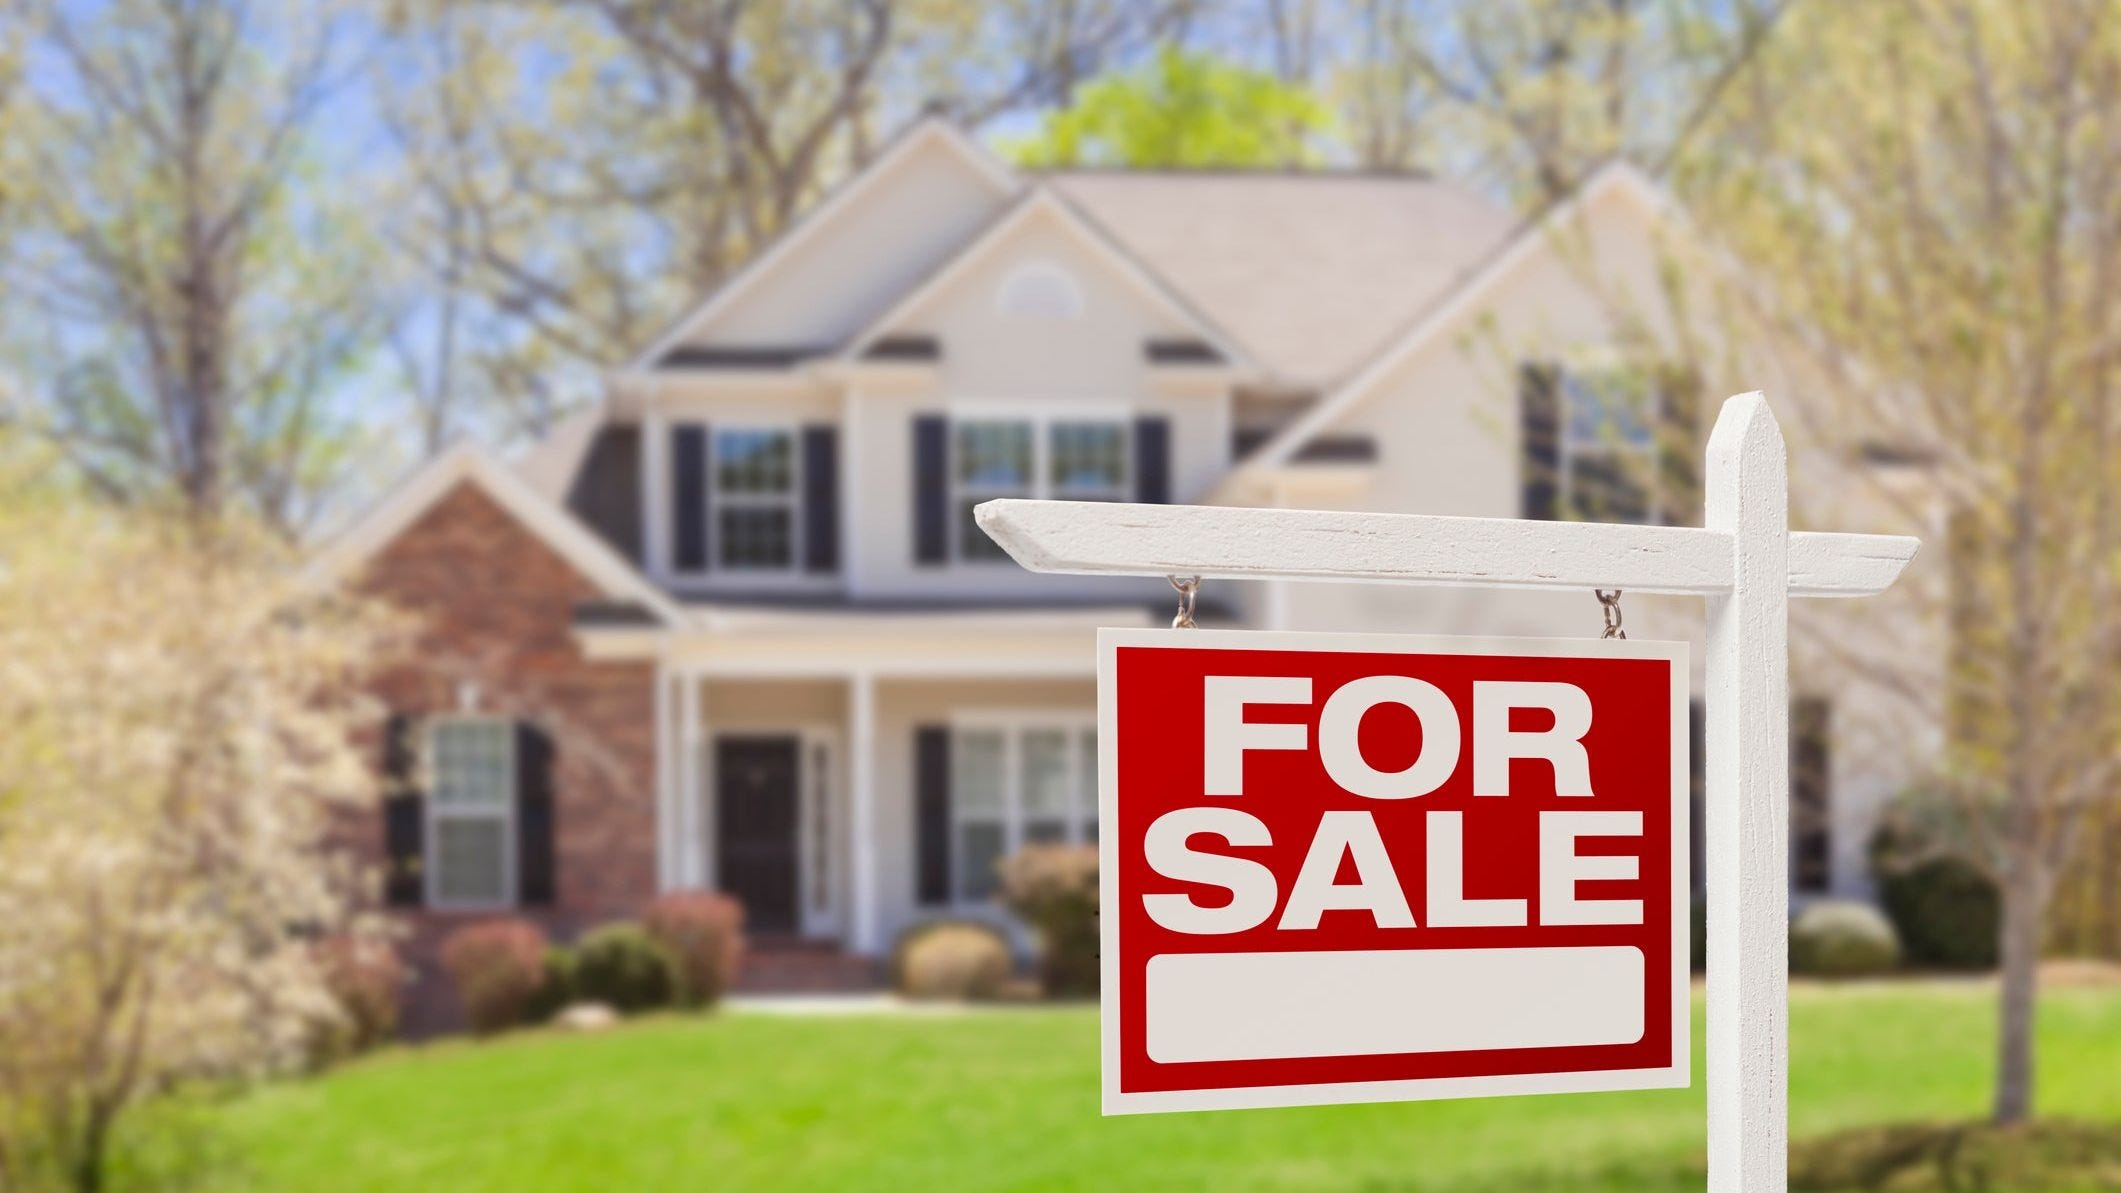